##modify the code to treat the dataset differently at last part

same code as before

In [1]:
#import libraries
import numpy as np
import h5py # reading and writing HDF5 files in Python
import matplotlib.pyplot as plt
import scipy #collection of mathematical algorithms and convenience functions built on the NumPy extension of Python
from PIL import Image # PIL is a library that adds image processing capabilities to your Python interpreter
from scipy import ndimage
%matplotlib inline # enables the display of Matplotlib figures directly in the notebook


In [7]:
from google.colab import drive
drive.mount('/content/drive')


train_dataset = h5py.File('/content/drive/MyDrive/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/drive/MyDrive/test_catvnoncat.h5', "r")
#import dataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# view the content contained in the loaded HDF5 format data file

print(train_dataset.keys())
print(train_dataset['train_set_x'])
print(train_dataset['train_set_y'])
print(train_dataset['list_classes'])

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
<HDF5 dataset "train_set_y": shape (209,), type "<i8">
<HDF5 dataset "list_classes": shape (2,), type "|S7">


In [17]:
# extract training set features and converting to a NumPy array
train_X = np.array(train_dataset["train_set_x"])
train_Y = np.array(train_dataset["train_set_y"])
# extract testing set features and converting to a NumPy array
test_X = np.array(test_dataset["test_set_x"])
test_Y = np.array(test_dataset["test_set_y"])

# extract classes and converting to a NumPy array
classes = np.array(test_dataset["list_classes"])

# print the shape
print("shape of train_X:", train_X.shape)
print("shape of train_Y:", train_Y.shape)
print("shape of classes:", classes.shape)
# print the class information
print("classes:", classes)

# reshape training and testing set labels to the shape (1, number of labels)
train_Y = train_Y.reshape((1, -1))
test_Y = test_Y.reshape((1, -1))

#print the shape
print("reshaped train_Y:", train_Y.shape)


shape of train_X: (209, 64, 64, 3)
shape of train_Y: (209,)
shape of classes: (2,)
classes: [b'non-cat' b'cat']
reshaped train_Y: (1, 209)


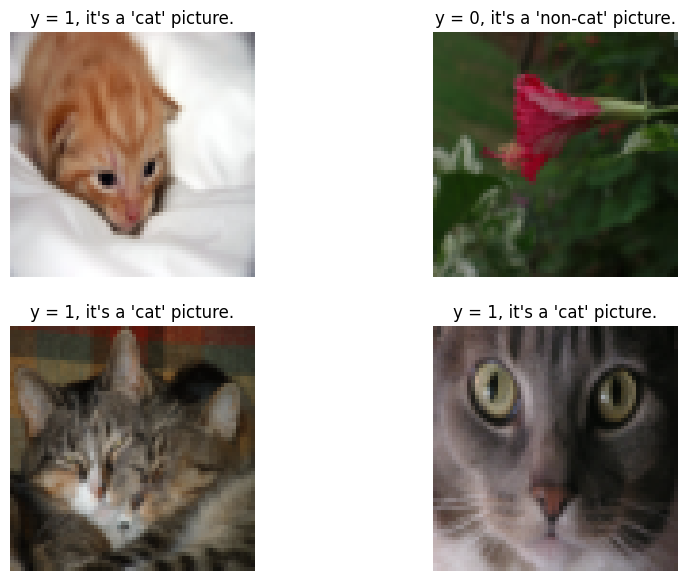

<Figure size 1000x700 with 0 Axes>

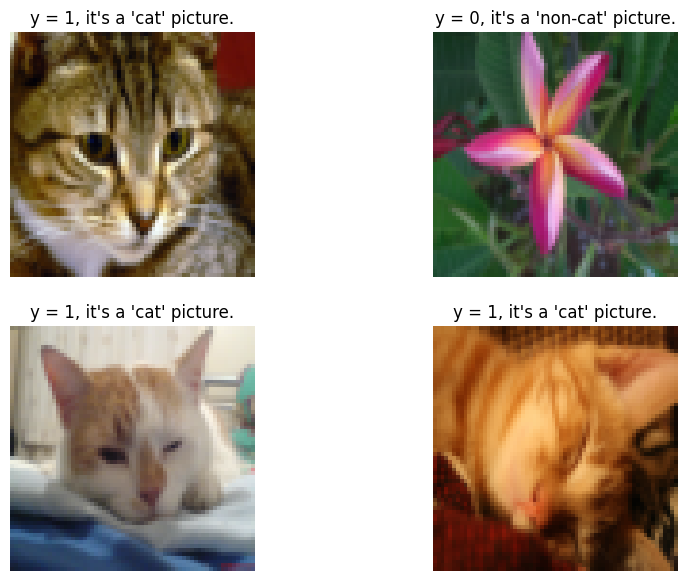

In [48]:
# show images and labels
def show_images_with_labels(indices, images, labels, classes, rows=2, columns=2, figsize=(10, 7)):
    fig = plt.figure(figsize=figsize)
# iterates over the given list of indices
    for i, index in enumerate(indices):
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(images[index])
        plt.axis('off')
        label = labels[0, index]
        title = f"y = {label}, it's a '{classes[np.squeeze(labels[:, index])].decode('utf-8')}' picture."
        plt.title(title)

# indices of images
train_indices = [57, 58, 59, 60]
test_indices = [15, 16, 17, 18]

# display images with labels for training set
show_images_with_labels(train_indices[:4], train_X, train_Y, classes)

# create figure oftest set
fig = plt.figure(figsize=(10, 7))

# display image
show_images_with_labels(test_indices[:4], test_X, test_Y, classes)




In [50]:
# image data is flatten and normalize
train_X_flat = (train_X.reshape(train_X.shape[0], -1)/255).T
print(train_X_flat.shape)
test_X_flat = (test_X.reshape(test_X.shape[0], -1)/255).T
print(test_X_flat.shape)

(12288, 209)
(12288, 50)


In [64]:
import numpy as np

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Returns:
    numpy array -- sigmoid(z)
    """
    # Compute the exponential of the input using numpy's exponential function
    exponent = np.exp(-z)

    # Compute the sigmoid value using the formula
    sigmoid_value = 1 / (1 + exponent)

    # Return the calculated sigmoid value
    return sigmoid_value



In [65]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Returns:
    dw -- gradient of the loss with respect to w, of the same shape as w
    db -- gradient of the loss with respect to b, a scalar
    cost -- negative log-likelihood cost for logistic regression
    """

    m = X.shape[1]

    # forward propagation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # backward propagation
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)

    cost = np.squeeze(cost)

    return dw, db, cost


In [66]:
# extract the flattened training data
X = train_X_flat
Y = train_Y

dim = train_X_flat.shape[0]

# initialize the weights and bias
w = np.zeros((dim, 1)) # weights, shape: (dim, 1)
b = 0 # bias

num_iterations = 5000
learning_rate = 0.01
record_cost = 50
costs = []

# loop through the iterations for training
for i in range(num_iterations):
    dw, db, cost = propagate(w, b, X, Y)

    # update the weights and bias
    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)

    # record the cost
    if i % record_cost == 0:
        costs.append(cost)
        print (f"Cost after iteration {i} is: {cost}")

# save the trained weights and bias
scipy.io.savemat("weights.mat", {"weights": w})
scipy.io.savemat("biases.mat", {"biases": b})


Cost after iteration 0 is: 0.6931471805599453
Cost after iteration 50 is: 0.924185452221605
Cost after iteration 100 is: 0.8239208681633668
Cost after iteration 150 is: 0.8895879487783844
Cost after iteration 200 is: 0.4189444728725304
Cost after iteration 250 is: 0.8242836668122653
Cost after iteration 300 is: 0.6173497040868365
Cost after iteration 350 is: 0.5768019284871436
Cost after iteration 400 is: 0.5221157718680645
Cost after iteration 450 is: 0.45931272475131196
Cost after iteration 500 is: 0.3877087488638536
Cost after iteration 550 is: 0.3097445917159323
Cost after iteration 600 is: 0.236254456759359
Cost after iteration 650 is: 0.18141890669070232
Cost after iteration 700 is: 0.1542221330656545
Cost after iteration 750 is: 0.14222476228206649
Cost after iteration 800 is: 0.13532782831487714
Cost after iteration 850 is: 0.1298443985389563
Cost after iteration 900 is: 0.12497148000327267
Cost after iteration 950 is: 0.12054608668425153
Cost after iteration 1000 is: 0.1164783

In [68]:
# print the shape
print(test_X_flat.shape)

# load the trained weights and biases
w = scipy.io.loadmat('weights.mat')["weights"]
b = scipy.io.loadmat('biases.mat')["biases"]

print(w.shape)
print(b.shape)

# compute the predictions for the testing set
A = sigmoid(np.dot(w.T, test_X_flat) + b)
Y_predict_test = (A >= 0.5) * 1.0
Y_predict_train = sigmoid(np.dot(w.T, X) + b)

print(f"train accuracy: {(100 - np.mean(np.abs(Y_predict_train - train_Y)) * 100):2f}")
print(f"test accuracy: {(100 - np.mean(np.abs(Y_predict_test - test_Y)) * 100):2f}")


(12288, 50)
(12288, 1)
(1, 1)
train accuracy: 97.020960
test accuracy: 68.000000


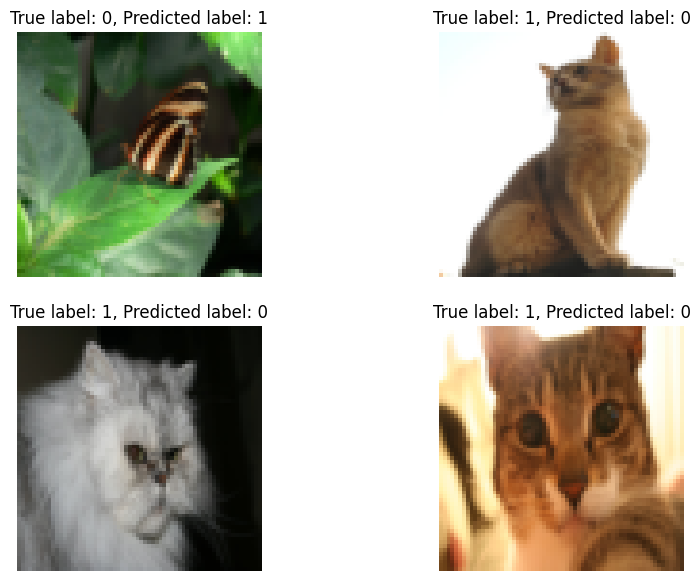

incorrect: [5, 6, 10, 11, 13, 18, 19, 24, 28, 29, 30, 34, 41, 44, 45, 46]


In [69]:
# list to store
incorrect_predictions = []

# iterating test set
for i in range(test_X.shape[0]):
    x = test_X_flat[:, i].reshape(-1, 1)
    true_label = test_Y[0, i]

# calculate the predicted label
    prediction = sigmoid(np.dot(w.T, x) + b) >= 0.5

# if the prediction matche true label
    if prediction != true_label:
        incorrect_predictions.append(i)

# displaying incorrectly predicted images
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

for i in range(min(4, len(incorrect_predictions))):
    index = incorrect_predictions[i]
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(test_X[index])
    plt.axis('off')
    plt.title(f"True label: {test_Y[0, index]}, Predicted label: {int(sigmoid(np.dot(w.T, test_X_flat[:, index].reshape(-1, 1)) + b) >= 0.5)}")

plt.show()

print("incorrect:", incorrect_predictions)



new code

##modify the code to treat the dataset differently


In [102]:
# split the original dataset to new training set and new testing set
new_train_X = train_X[:168]
new_train_Y = train_Y[:, :168]
new_test_X = train_X[168:]
new_test_Y = train_Y[:, 168:]


In [103]:
# flatten the new training and testing sets
new_train_X_flat = (new_train_X.reshape(new_train_X.shape[0], -1) / 255).T
new_test_X_flat = (new_test_X.reshape(new_test_X.shape[0], -1) / 255).T


In [104]:
# retrain the model
X_new_train = new_train_X_flat
Y_new_train = new_train_Y


In [105]:
# set variables and parameters in order to retrain the model
dim_new = new_train_X_flat.shape[0]
w_new = np.zeros((dim_new, 1))
b_new = 0
num_iterations_new = 5000
learning_rate_new = 0.01
record_cost_new = 50
costs_new = []

# loop through the iterations for training
for i in range(num_iterations_new):
    dw_new, db_new, cost_new = propagate(w_new, b_new, X_new_train, Y_new_train)

    w_new = w_new - (learning_rate_new * dw_new)
    b_new = b_new - (learning_rate_new * db_new)

    if i % record_cost_new == 0:
        costs_new.append(cost_new)
        print(f"Cost after iteration {i} is: {cost_new}")

Cost after iteration 0 is: 0.6931471805599453
Cost after iteration 50 is: 2.6771596292828166
Cost after iteration 100 is: 1.3363741628906518
Cost after iteration 150 is: 1.8872531407378181
Cost after iteration 200 is: 0.9862464746149049
Cost after iteration 250 is: 0.981809864964163
Cost after iteration 300 is: 0.7915142328459599
Cost after iteration 350 is: 0.6211126604662506
Cost after iteration 400 is: 0.4583295285691281
Cost after iteration 450 is: 0.2995813698043829
Cost after iteration 500 is: 0.17657408654081877
Cost after iteration 550 is: 0.136312734161539
Cost after iteration 600 is: 0.1251156547627888
Cost after iteration 650 is: 0.11825416566043546
Cost after iteration 700 is: 0.11247240144935175
Cost after iteration 750 is: 0.10739769306912424
Cost after iteration 800 is: 0.1028523639167949
Cost after iteration 850 is: 0.09872688450787714
Cost after iteration 900 is: 0.09494787097658133
Cost after iteration 950 is: 0.09146284953179946
Cost after iteration 1000 is: 0.088232

In [106]:
# compute predictions of modified training set
A_new_train = sigmoid(np.dot(w_new.T, X_new_train) + b_new)
Y_predict_new_train = (A_new_train >= 0.5) * 1.0

# compute predictions of  modified test set
A_new_test = sigmoid(np.dot(w_new.T, new_test_X_flat) + b_new)
Y_predict_new_test = (A_new_test >= 0.5) * 1.0

print(f"New train accuracy: {(100 - np.mean(np.abs(Y_predict_new_train - Y_new_train)) * 100):.2f}")
print(f"New test accuracy: {(100 - np.mean(np.abs(Y_predict_new_test - new_test_Y)) * 100):.2f}")

New train accuracy: 100.00
New test accuracy: 53.66


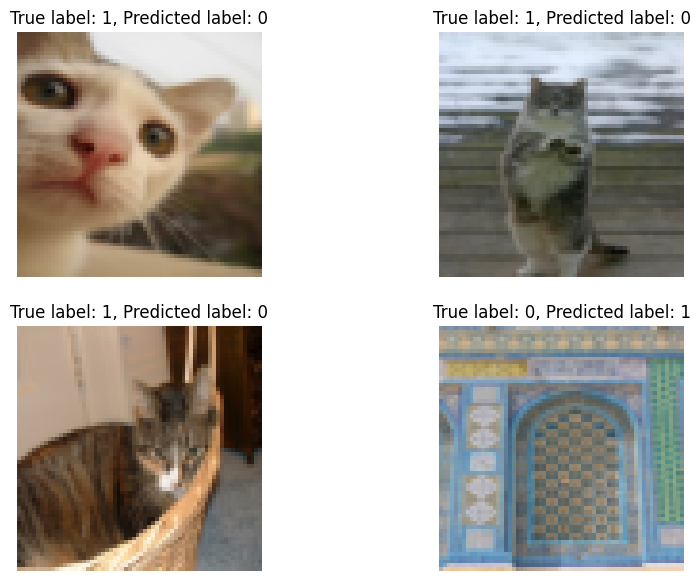

Indices of misclassified images: [1, 2, 3, 4, 7, 9, 11, 15, 17, 20, 24, 27, 28, 29, 30, 32, 36, 37, 39]


In [107]:
# store a list of image indiceson the new test set.
incorrect_predictions_new = []
# iterate over each sample in the new test set
for i in range(new_test_X.shape[0]):
    x_new = new_test_X_flat[:, i].reshape(-1, 1)
    true_label_new = new_test_Y[0, i]
    prediction_new = sigmoid(np.dot(w_new.T, x_new) + b_new) >= 0.5
    if prediction_new != true_label_new:
        incorrect_predictions_new.append(i)

# display 4 of the misclassified images
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

for i in range(min(4, len(incorrect_predictions_new))):
    index_new = incorrect_predictions_new[i]
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(new_test_X[index_new])
    plt.axis('off')
    plt.title(f"True label: {new_test_Y[0, index_new]}, Predicted label: {int(sigmoid(np.dot(w_new.T, new_test_X_flat[:, index_new].reshape(-1, 1)) + b_new) >= 0.5)}")

plt.show()

# print the indices of the misclassified image
print("Indices of misclassified images:", incorrect_predictions_new)